In [1]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets 
import matplotlib.pyplot as plt
from nn import nn  

In [2]:
# Function to load and preprocess MNIST data
mnist = sklearn.datasets.load_digits()
X = mnist.data.astype('float32')
X /= np.max(X)  # Normalize pixel values to be between 0 and 1

# Function to one-hot encode labels
# def one_hot_encode(y, num_classes):
#     return np.eye(num_classes)[y] # n x n matrix with diagonal = 1 and 0 elsewhere

# # Load and preprocess MNIST data
# X, y = load_mnist()

In [3]:
# Split the data into training and validation sets
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

print("training dataset dimensions:", X_train.shape)
print("validation dataset dimensions", X_val.shape)

training dataset dimensions: (1437, 64)
validation dataset dimensions (360, 64)


In [4]:
# Define the architecture of the neural network
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}
]

In [5]:
# Initialize the Neural Network
nn = nn.NeuralNetwork(
    nn_arch=nn_architecture,
    lr=10, # tried 0.01, 0.1, 
    seed=42,
    batch_size=np.shape(X_train)[0],
    epochs=1000,
    loss_function='_mean_squared_error'
)

In [6]:
# Train the Neural Network
# loss_train, loss_val = nn.fit(X_train, y_train_encoded.T, X_val, y_val_encoded.T)
loss_train, loss_val = nn.fit(X_train, X_train.T, X_val, X_val.T)

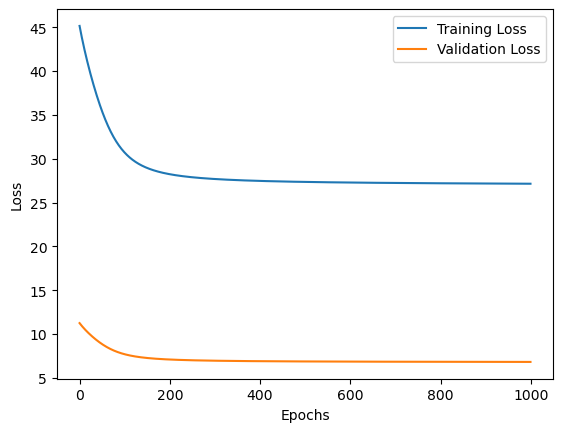

In [ ]:
# Plot the training and validation loss
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the validation set
y_val_pred = nn.predict(X_val)

# Convert one-hot encoded predictions to labels
y_val_pred_labels = np.argmax(y_val_pred, axis=1)  # axis=1 for row-wise operation